In [4]:
import pickle
import torch
import numpy as np
from matplotlib import pyplot as plt
from transformers import BertForMaskedLM

In [5]:
with open('./Fisher/BERT/fisher_bert.pkl','rb') as fp:
    fisher = pickle.load(fp)
    
fisher_means = []
for i in range(len(fisher)):
    fisher_means.append(np.mean(fisher[i].numpy()))
    
fisher_means = np.asarray(fisher_means)

model = BertForMaskedLM.from_pretrained(
    pretrained_model_name_or_path='bert-base-uncased')

named_params = [x[0] for x in model.named_parameters()]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Weights and Biases: Layer-wise Mapping for BERT

In [6]:
layer_map = {
    0 : 'attention_self',
    1 : 'attention_output',
    2 : 'intermediate',
    3 : 'output'
}

score_map = {
    np.mean(fisher_means[[0, 1, 2, 3, 4]]) : 'embedding_layer'
}

start = 5
for i in range(0,12):
    for idx, j in enumerate([6, 4, 2, 4]):
        end = start + j
        #Skip BertIntermediate Layer - It has no dropout
        if j != 2:
            score_map[np.mean(fisher_means[start: end])] = '{}_{}'.format(i, layer_map[idx])
        start = end
        
sorted_score_map = {k: v for k, v in sorted(score_map.items(), key=lambda item: item[0])}

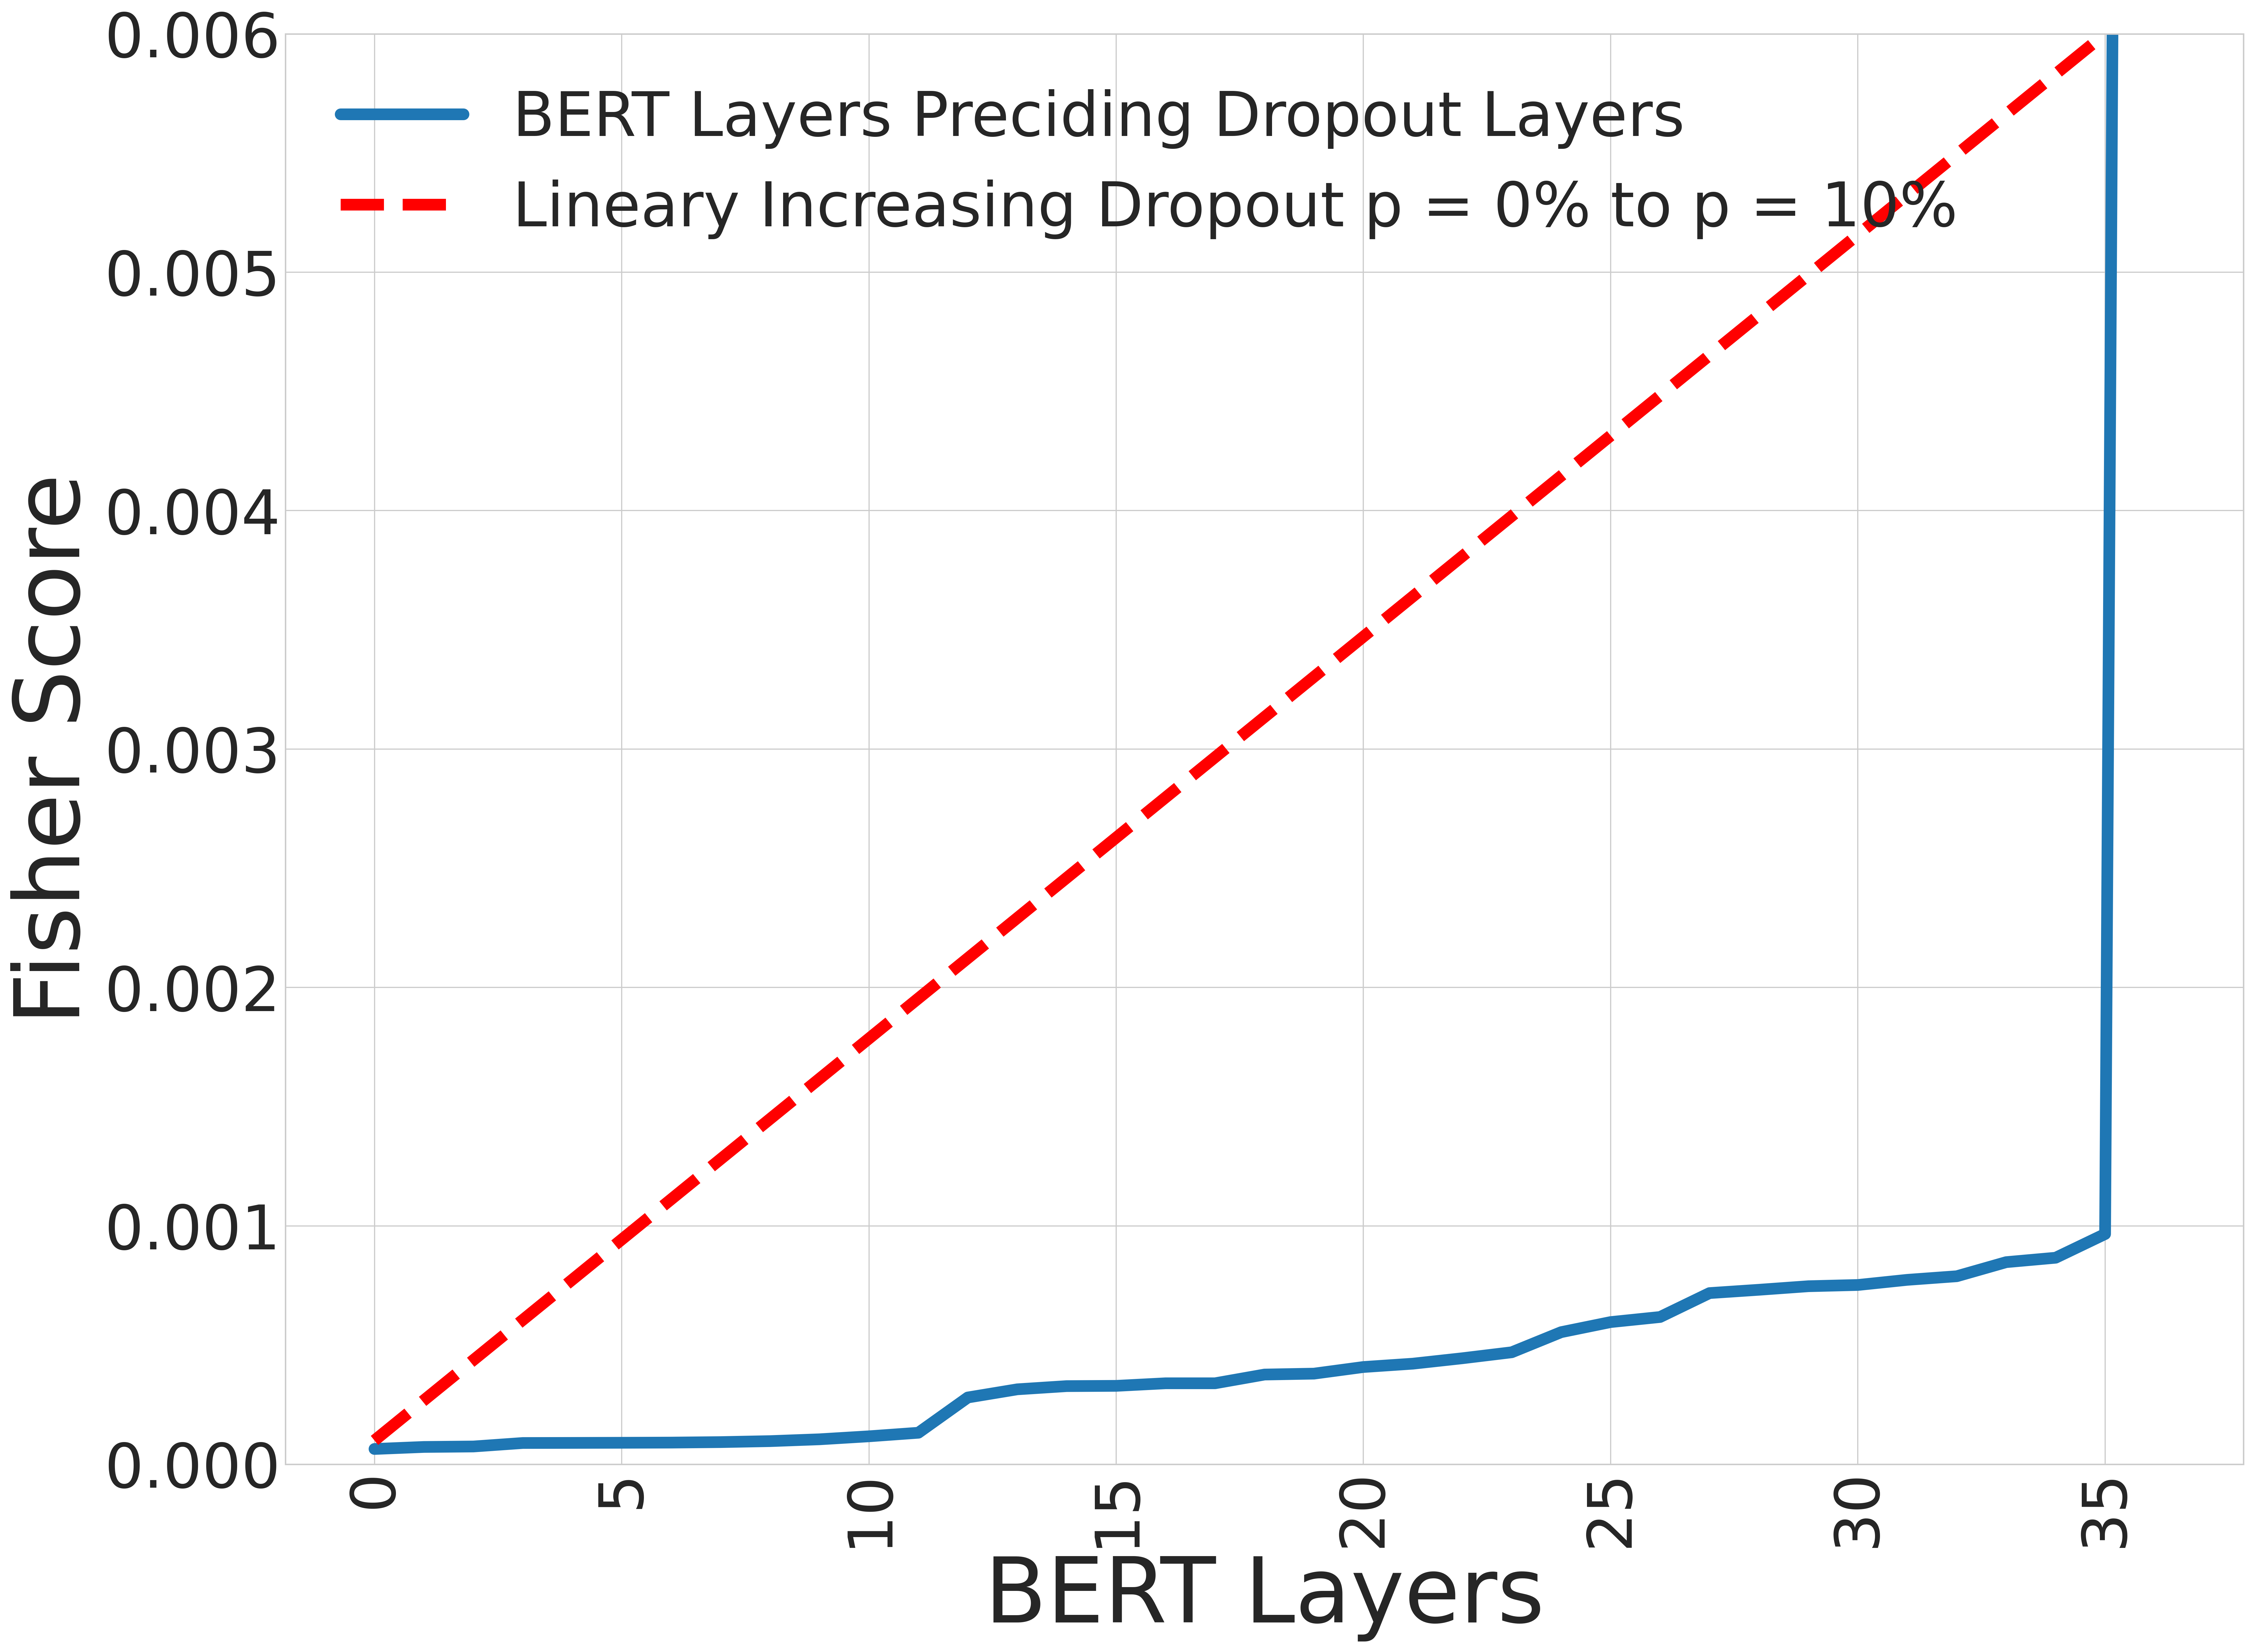

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)
plt.plot(range(len(sorted_score_map.values())), sorted_score_map.keys(), linewidth = 8, label = 'BERT Layers Preciding Dropout Layers')
plt.plot([0, len(sorted_score_map.values()) -2], [0.0001, 0.006], color = 'red', linewidth = 8, linestyle='dashed', label = 'Lineary Increasing Dropout p = 0% to p = 10%')
plt.legend(prop={'size': 42}, loc = 'upper left', ncol=1 ,facecolor='floralwhite')
plt.xticks(fontsize= 42, rotation = 90)
plt.yticks(fontsize= 42)
plt.xlabel('BERT Layers', fontsize= 62)
plt.ylabel('Fisher Score', fontsize= 62)
plt.ylim(0, 0.006)
plt.show()

## Mapping Indices of DropOut Layers that Correspond to BERT Layers

In [8]:
dropout_dict = {
'embedding_layer' : 7,  
'0_attention_self' : 16, 
'0_attention_output': 20 ,
'0_output': 27,
'1_attention_self' : 34, 
'1_attention_output': 38, 
'1_output': 44, 
'2_attention_self' : 51, 
'2_attention_output' : 55, 
'2_output' : 61, 
'3_attention_self' : 68, 
'3_attention_output' : 72, 
'3_output' : 78, 
'4_attention_self' : 85, 
'4_attention_output' : 89, 
'4_output' : 95, 
'5_attention_self' : 102,
'5_attention_output' : 106,
'5_output' : 112,
'6_attention_self' : 119,
'6_attention_output' : 123,
'6_output' : 129,
'7_attention_self' : 136,
'7_attention_output' : 140,
'7_output' : 146,
'8_attention_self' : 153,
'8_attention_output' : 157,
'8_output' : 163,
'9_attention_self' : 170,
'9_attention_output' : 174,
'9_output' : 180,
'10_attention_self' : 187,
'10_attention_output' : 191,
'10_output' : 197,
'11_attention_self' : 204,
'11_attention_output' : 208,
'11_output' : 214
}

In [9]:
list_of_indices = []
for k,v in sorted_score_map.items():
    list_of_indices.append(dropout_dict[v])
print(list_of_indices)

[136, 187, 170, 153, 34, 119, 204, 51, 16, 102, 68, 85, 208, 20, 174, 191, 140, 38, 123, 157, 55, 106, 89, 72, 214, 180, 129, 112, 61, 27, 197, 163, 146, 44, 95, 78, 7]


In [18]:
print('Corresponding Dropout Values')
print(np.arange(0, 0.099, 0.00275))

Corresponding Dropout Values
[0.      0.00275 0.0055  0.00825 0.011   0.01375 0.0165  0.01925 0.022
 0.02475 0.0275  0.03025 0.033   0.03575 0.0385  0.04125 0.044   0.04675
 0.0495  0.05225 0.055   0.05775 0.0605  0.06325 0.066   0.06875 0.0715
 0.07425 0.077   0.07975 0.0825  0.08525 0.088   0.09075 0.0935  0.09625
 0.099  ]
